In [1]:
# Use this script to test and find the best silence lens and threshold
# Splices fragment of audio file
#TODO https://stackoverflow.com/questions/59102171/getting-timestamps-from-audio-using-python
#TODO add directory

from pydub import AudioSegment
from pydub.utils import make_chunks


audio_path = input("Input audio path") #path refers to the file
loaded_audio = AudioSegment.from_file(audio_path, format="m4a")

#Parameters
predefined_ms = 120 * 1000 # pydub calculates in millisec

#Determine whether to splice first or last seconds of audio
first_sec_audio = loaded_audio[:predefined_ms] 
#last_sec_audio = loaded_audio[-predefined_ms:] 

#Export spliced sample audio
first_sec_audio.export("TEEEEST.wav", format="wav")# Use this script to test and find the best 


<_io.BufferedRandom name='TEEEEST.wav'>

In [8]:
#Use this to adjust parameters. Check if the start and stop times correspond with wave plot.

from pydub.silence import detect_nonsilent


#Convert test wav to audio_segment
audio_segment = AudioSegment.from_wav("TEEEEST.wav")

#adjust target amplitude
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))

#Print detected non-silent chunks, which in our case would be spoken words.
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=4 * 1000, silence_thresh=-30, seek_step=1)

#convert ms to seconds
print("start,Stop")
for chunks in nonsilent_data:
    print([chunk/1000 for chunk in chunks])


length of audio_segment=120.0 seconds
start,Stop


TypeError: can only concatenate str (not "list") to str

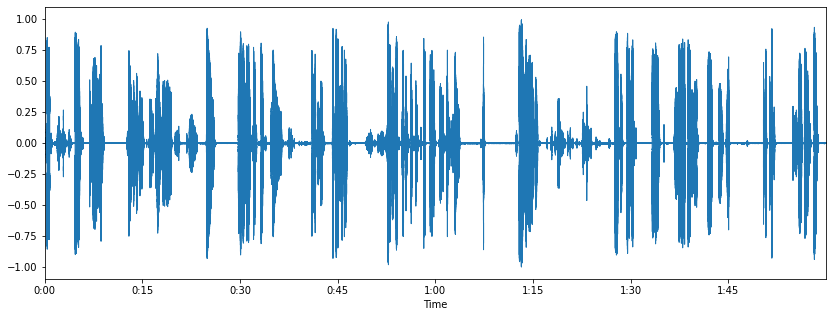

In [6]:

import librosa
import matplotlib.pyplot as plt
import librosa.display


#Plots the sample test audio
test_dir = "TEEEEST.wav"
audio_data, sampling_rate = librosa.load(test_dir)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_data, sr=sampling_rate)

